<a id='start'></a>
# Lezione 3 - Time series

In questo notebook viene spiegato cosa le serie storiche, o Time Series, e come possiamo utilizzare python per fare previsioni su di esse.<br>
<br>
Il notebook è suddiviso nelle seguenti sezioni:<br>
- [Introduzione alle Serie Storiche](#section1)
    - [Caratteristiche delle serie storiche](#section1-1)
    - [Pattern](#section1-2)
    - [Stazionarietà](#section1-3)
    - [Autocorrelazione](#section1-4)
- [Tecniche](#section2)
    - [Come disegnare una serie storica](#section2-1)
    - [Come gestire i dati mancanti](#section2-2)
    - [Come scomporre una serie storica nelle sue componenti](#section2-3)
    - [Eliminare trend o stagionalità](#section2-4)
    - [Ammorbidire una serie storica](#section2-5)
- [Fare il forecast di una serie storica](#section3)
- [Prophet](#section4)

<a id='section1'></a>
## Introduzione alle Serie Storiche

Le serie storiche (time series) sono una sequenza di osservazioni registrate a intervalli di tempo regolari o irregolari.

A seconda della frequenza delle osservazioni, una serie temporale può in genere essere oraria, giornaliera, settimanale, mensile, trimestrale e annuale. A volte, potresti avere anche secondi e serie temporali minime, come numero di clic e visite degli utenti ogni minuto, ecc.

Un esempio di serie storica sono i titoli finanziari o i dati dei sensori.

**Ma perché anche analizzare una serie storica?**

Perché è il passaggio preparatorio fondamentale prima di sviluppare una previsione della serie per capire meglio come sono i dati e come si evolvono nel tempo.

**Cosa comporta l'analisi di una serie temporale?**

L'analisi delle serie temporali comprende la comprensione di vari aspetti della natura intrinseca delle serie in modo da essere meglio informati per creare previsioni significative e accurate.


### Perché le serie storiche sono così speciali?

Cosa rende una time series diversa da un normale problema di regressione?
Possiamo identiricare almeno 2 cose:

- **la time series dipende dal tempo**: questo implica che l'assunto di base di un modello di regressione lineare secondo cui le osservazioni sono indipendenti tra loro non vale in questo caso, proprio per la dipendenza dalla variabile tempo.
- insieme a un trend crescente o decrescente, la maggior parte delle time series ha una qualche forma di **trend di stagionalità**, ovvero variazioni specifiche di un determinato periodo di tempo. Ad esempio, se vedi le vendite di una giacca di lana nel tempo, troverai invariabilmente vendite più elevate nelle stagioni invernali.

<a id='section1-1'></a>
### Caratteristiche delle Serie Storiche

Tutte le serie storiche sono funzioni composte da 4 componenti distinte:
- il livello base
- il trend
- la stagionalità
- l'errore

Possiamo quindi avere:

1. **Additive time series**  
   La cui equiazione può essere scritta come una somma delle quattro componenti descritte:  
   `Value = Base Level + Trend + Seasonality + Error`

2. **Multiplicative Time Series**  
   La cui equazione può essere scritta come un prodotto delle quattro componenti descritte:  
   `Value = Base Level x Trend x Seasonality x Error`



<a id='section1-2'></a>
### Pattern

Nella time series possiamo avere diversi tipi di pattern.

Distinguiamo, per esempio: 

- **Trend** che rappresentano la pendenza (positiva o negativa) osservata nei dati.
- **Stagionalità** che si ha quando i dati si ripetono in cicli di breve termine con andamenti simili.

Vediamo tre esempi di serie storiche con solo trend, solo stagionalità o entrambe.

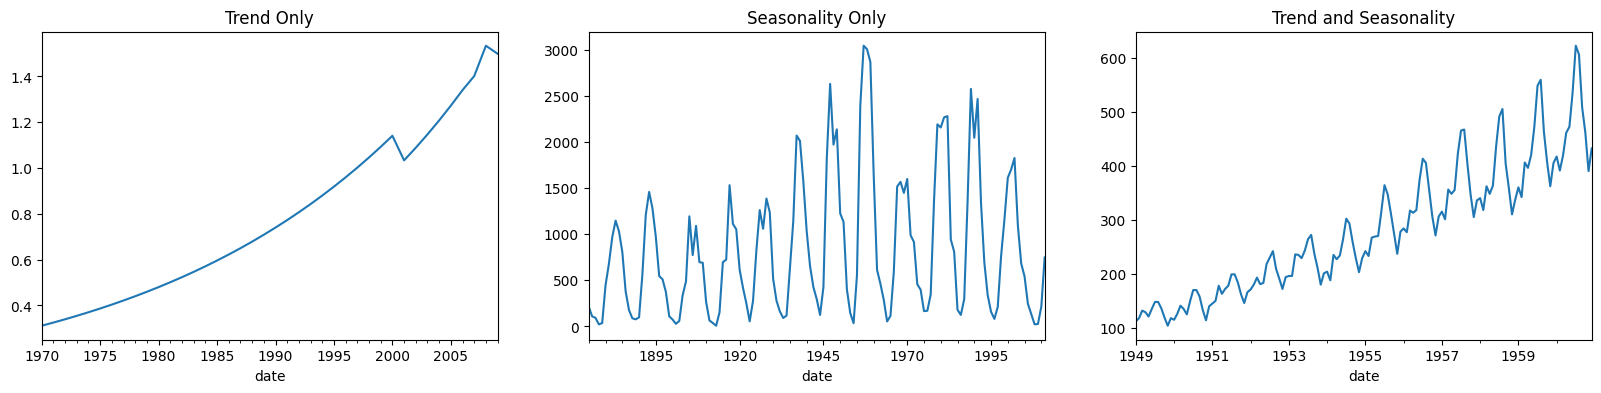

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

fig, axes = plt.subplots(1,3, figsize=(20,4))

trend = pd.read_csv('data/guinearice.csv', parse_dates=['date'], index_col='date')
trend.plot(title='Trend Only', legend=False, ax=axes[0])

season = pd.read_csv('data/sunspotarea.csv', parse_dates=['date'], index_col='date')
season.plot(title='Seasonality Only', legend=False, ax=axes[1])

trend_and_season = pd.read_csv('data/AirPassengers.csv', parse_dates=['date'], index_col='date')
trend_and_season.plot(title='Trend and Seasonality', legend=False, ax=axes[2])

plt.show()

<a id='section1-3'></a>
### Stazionarietà

La stazionarietà è una proprietà significativa di una serie storica.

Una serie stazionaria è una serie in cui **i valori della serie non sono una funzione del tempo**.
Cioè, le **proprietà statistiche** delle serie come media e varianza sono **costanti nel tempo**.
Una serie storica stazionaria è priva anche di effetti stagionali.

Quindi, come identificare se una serie è stazionaria o no? Tracciamo alcuni esempi per chiarire

![Stationary Time Series](img/stationary-ts.png)

Quindi perché è importante una serie stazionaria?

La maggior parte dei metodi di previsione statistica sono progettati per funzionare su una serie storica stazionaria. Il primo passo nel processo di previsione è in genere quello di effettuare una trasformazione per convertire una serie non stazionaria in stazionaria.

Per verificare la stazionarietà di una serie storica, esistono alcuni metodi statistici che possono essere applicati. Per esempio i principali sono:

1. **Stampa rolling delle statistiche**: possiamo tracciare la media mobile o la varianza mobile e vedere se varia nel tempo. Spostando media / varianza intendo che in qualsiasi momento "t", prenderemo la media / varianza dell'ultimo anno, ovvero gli ultimi 12 mesi. Ma ancora una volta questa è più una tecnica visiva.

2. **Test di Dickey-Fuller**: questo è uno dei test statistici per il controllo della stazionarietà. Qui l'ipotesi nulla è che il TS non sia stazionario. I risultati del test comprendono una statistica del test e alcuni valori critici per i livelli di confidenza delle differenze. Se la "Statistica del test" è inferiore al "Valore critico", possiamo rifiutare l'ipotesi nulla e dire che la serie è stazionaria.

Per maggiori dettagli su Dickey-Fuller Test puoi controllare questo articolo (purtroppo questo esempio è in R _:-P_ ): \
https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/

In Python possiamo fare un'analisi di stazionarietà come segue:

<Axes: title={'center': 'SunSpotAreas'}, xlabel='date'>

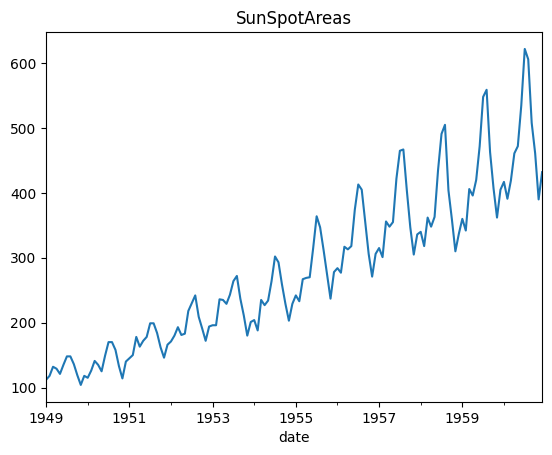

In [4]:
import pandas as pd

data = pd.read_csv('data/AirPassengers.csv', parse_dates=['date'], index_col='date')
data.plot(title='SunSpotAreas', legend=False)

In [5]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data.values)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


Questo esempio mostra una serie non stazionaria (con trend e stagionalità) e infatti vediamo che la statistica è molto al di fuori dei valori critici e che il p-value è molto superiore a 0.05. Per questo rifiutiamo l'ipotesi nulla (che la serie sia non stazionaria).

<a id='section1-4'></a>
### Autocorrelazione

L'autocorrelazione è semplicemente la correlazione di una serie con i suoi ritardi.
Se una serie è significativamente autocorrelata, ciò significa che **i valori precedenti della serie (ritardi) possono essere utili per prevedere il valore corrente**.

L'autocorrelazione **misura un insieme di valori correnti rispetto a un insieme di valori passati per vedere se sono correlati**. È ampiamente utilizzata nell'analisi e nella previsione di serie storiche.

Possiamo calcolare la correlazione per le attuali osservazioni delle serie temporali con le osservazioni dei precedenti passi temporali chiamati ritardi.

Un diagramma dell'autocorrelazione di una serie storica è chiamato funzione di autocorrelazione (ACF).

**L'autocorrelazione parziale** trasmette anche informazioni simili ma trasmette la pura correlazione di una serie e il suo ritardo, escludendo i contributi di correlazione dai ritardi intermedi.

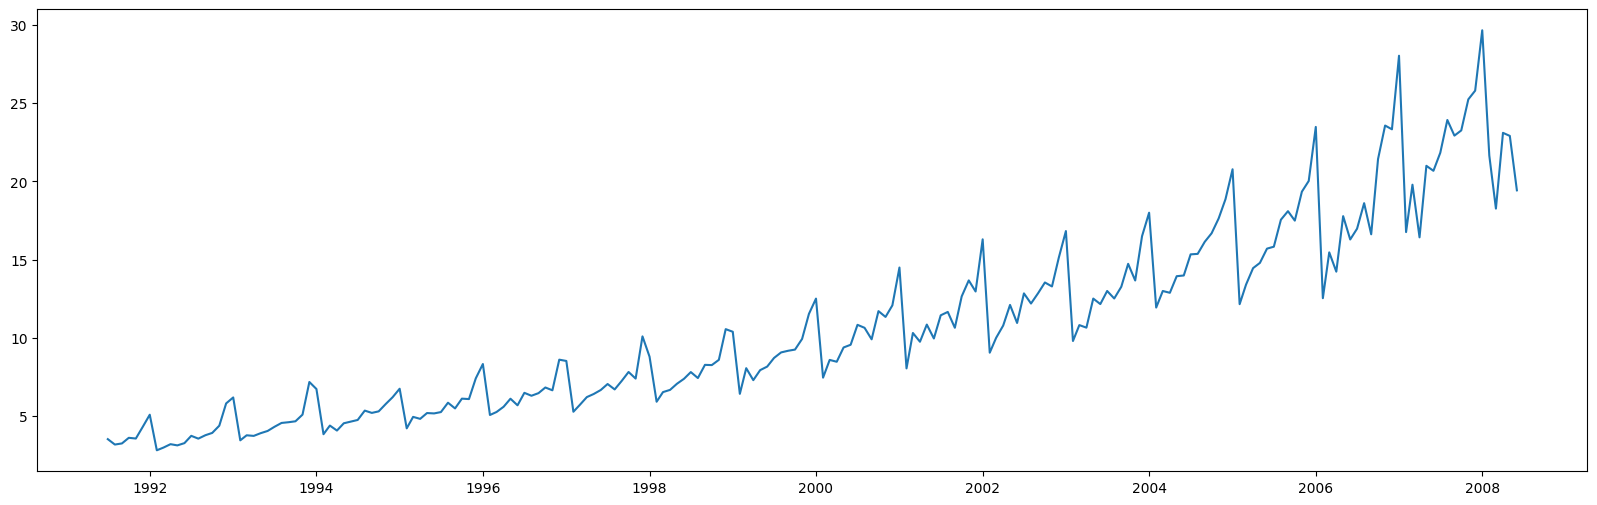

In [3]:
df = pd.read_csv('data/a10.csv', parse_dates=['date'], index_col='date')

plt.figure(figsize=(20,6))
plt.plot(df.index, df.values)
plt.show()

Con i dati mostrati nella serie storica qui sopra, proviamo ad analizzare l'autocorrelazione:

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


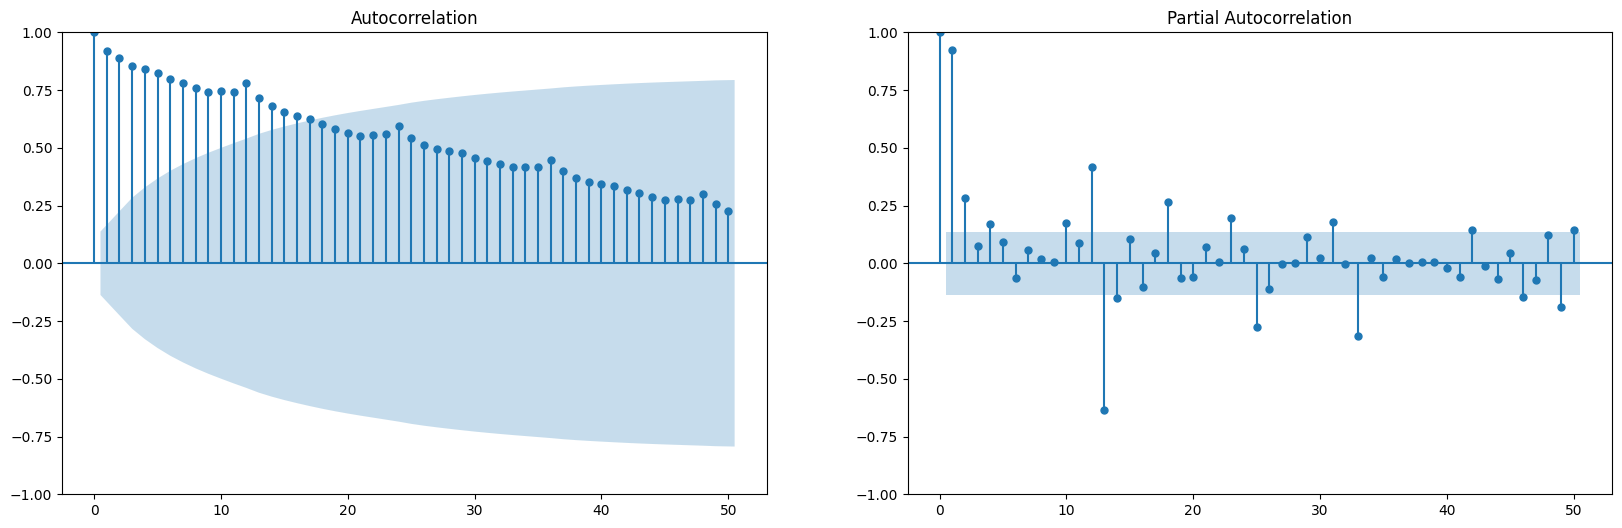

In [4]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(20,6))
plot_acf(df.value.tolist(), lags=50, ax=axes[0])
plot_pacf(df.value.tolist(), lags=50, ax=axes[1])
plt.show()

Possiamo usare le funzioni di autocorrelazione parziale e autocorrelazione per identificare i parametri del modelli di forecast (ad es. ARIMA).

I parametri del modello diventano ediventi soprattutto nel grafico della funzione di autocorrelazione parziale. Su questo grafico, possiamo analizzare i picchi significativi: un picco significativo si estenderà oltre i limiti dell'intervallo di significatività.

Proviamo a vedere come si distribuiscono i dati sui vari mesi creando un grafico apposito:

<AxesSubplot: xlabel='date', ylabel='value'>

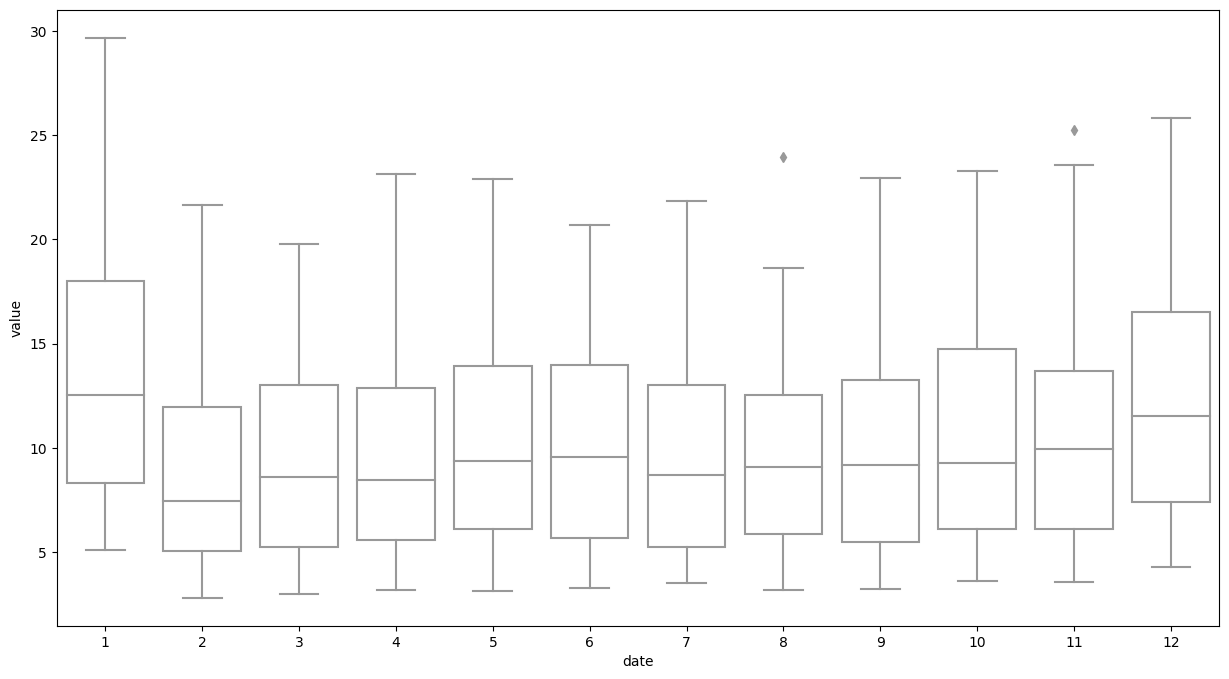

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.boxplot(data=df,
           x=df.index.month,
           y=df.value,
           color='white')

<a id='section2'></a>
## Tecniche

Vediamo ora alcune tecniche di disegno ed analisi delle serie storiche per comprendere come le librerie python possano aiutarci nel manipolare dati di questo tipo.

<a id='section2-1'></a>
### Come disegnare una serie storica

Per disegnare una serie storica si possono usare le classiche librerie per fare grafici già utilizzate in Python. 

Solitamente vengono usati grafici a linee con il tempo lungo l'asse delle ordinate.

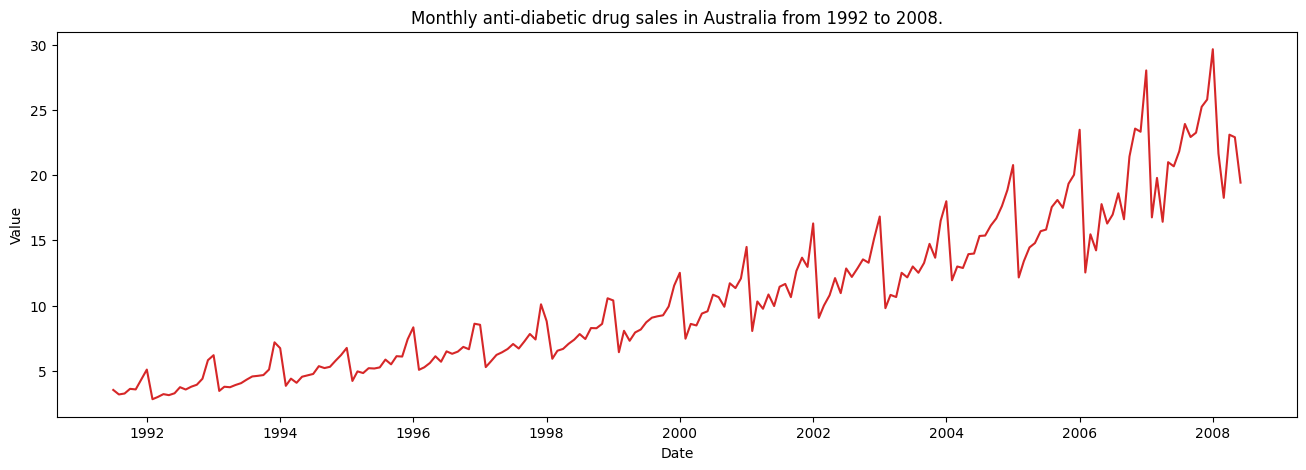

In [5]:
df = pd.read_csv('data/a10.csv', parse_dates=['date'], index_col='date')

plt.figure(figsize=(16,5))
plt.plot(df.index, df.value, color='tab:red')
plt.gca().set(title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.', xlabel='Date', ylabel='Value')
plt.show()

Una rappresentazione un po' più artoicolata è la cosiddetta two-sided view. In questa visualizzazione sono mostrate due time series appaiata in modo da apprezzarne gli andamenti. Spesso questa visualizzazione viene utilizzata per mostrare una serie storica appaiata con se stessa in modo da aplificare alcune sue caratteristiche all'analisi visiva.

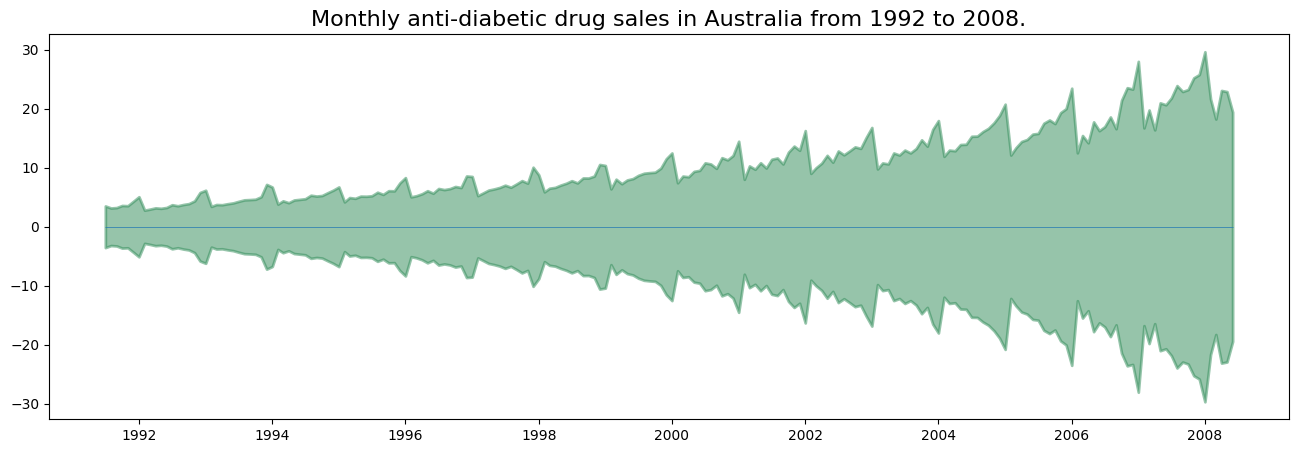

In [6]:
plt.figure(figsize=(16,5))
plt.fill_between(df.index, y1=df.value, y2=-df.value, alpha=0.5, linewidth=2, color='seagreen')
plt.title('Monthly anti-diabetic drug sales in Australia from 1992 to 2008.', fontsize=16)
plt.hlines(y=0, xmin=np.min(df.index), xmax=np.max(df.index), linewidth=.5)
plt.show()

<a id='section2-2'></a>
### Come gestire i dati mancanti

A volte, le serie temporali avranno date/orari mancanti. Ciò significa che i dati non sono stati acquisiti o non erano disponibili per quei periodi.

A seconda della natura della serie, si desidera provare diversi approcci per "riempire" i dati mancanti. Alcune alternative efficaci all'imputazione sono:

1. Forward Fill
1. Backward Fill
1. Linear Interpolation
1. Cubic interpolation

Vediamo le varie tecniche applicare con Python.

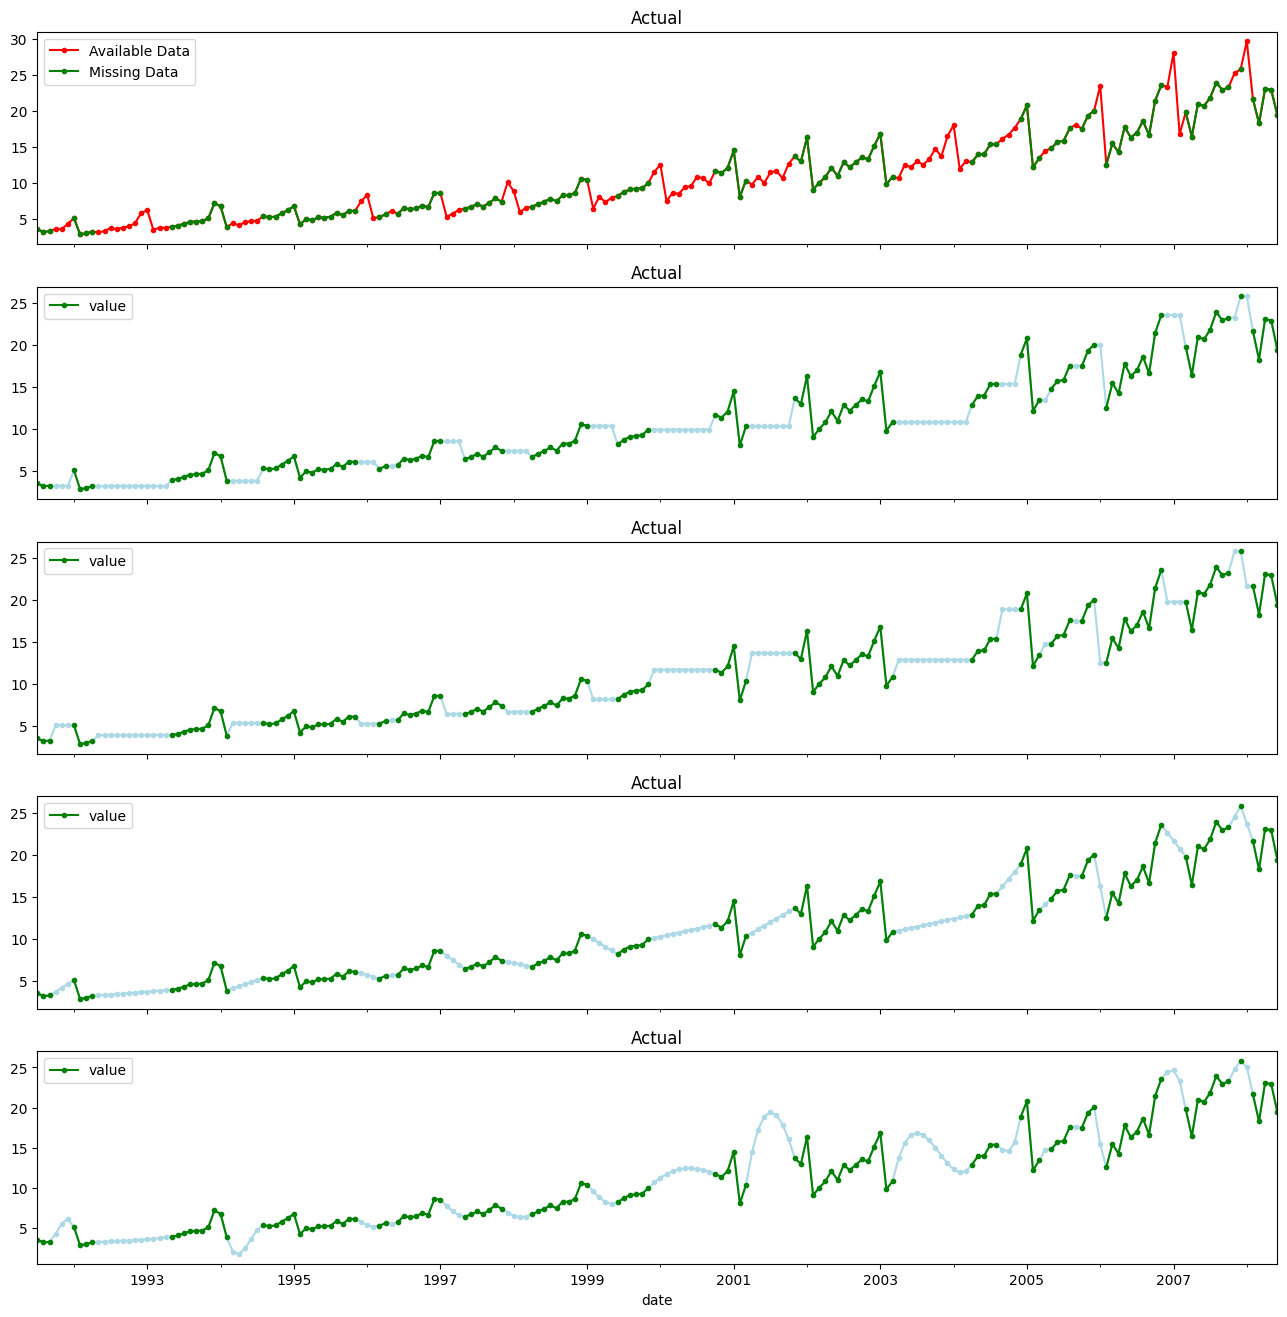

In [7]:
from sklearn import metrics
from scipy import interpolate

df = pd.read_csv('data/a10.csv', parse_dates=['date'], index_col='date')
df_missing = pd.read_csv('data/a10-missing.csv', parse_dates=['date'], index_col='date')

fig, axes = plt.subplots(5, 1, sharex=True, figsize=(16, 16))
plt.rcParams.update({'xtick.bottom': False})

## 0. ACTUAL DATA
df.value.plot(title='Actual', ax=axes[0], label='Actual', color='red', style=".-")
df_missing.plot(title='Actual', ax=axes[0], label='Actual', color='green', style=".-")
axes[0].legend(["Available Data","Missing Data"])

## 1. FORWARD FILL (CLASSIC)
df_ffill = df_missing.ffill()
error = np.round(metrics.mean_squared_error(df['value'], df_ffill['value']), 2)
df_ffill['value'].plot(title='Forward Fill (MSE: ' + str(error) +")", color='lightblue', ax=axes[1], label='Forward Fill', style=".-")
df_missing.plot(title='Actual', ax=axes[1], label='Actual', color='green', style=".-")

## 2. BACKWARD FILL (CLASSIC)
df_bfill = df_missing.bfill()
error = np.round(metrics.mean_squared_error(df['value'], df_bfill['value']), 2)
df_bfill['value'].plot(title="Backward Fill (MSE: " + str(error) +")", color='lightblue', ax=axes[2], label='Back Fill', style=".-")
df_missing.plot(title='Actual', ax=axes[2], label='Actual', color='green', style=".-")

## 3. LINEAR INTERPOLATION
df_linear = df_missing.copy()
df_linear['rownum'] = np.arange(df_linear.shape[0])
df_nona = df_linear.dropna(subset = ['value'])
f = interpolate.interp1d(df_nona['rownum'], df_nona['value'])
df_linear['linear_fill'] = f(df_linear['rownum'])
error = np.round(metrics.mean_squared_error(df['value'], df_linear['linear_fill']), 2)
df_linear['linear_fill'].plot(title="Linear Fill (MSE: " + str(error) +")", color='lightblue', ax=axes[3], label='Cubic Fill', style=".-")
df_missing.plot(title='Actual', ax=axes[3], label='Actual', color='green', style=".-")

## 5. CUBIC INTERPOLATION
df_cubic = df_missing.copy()
f2 = interpolate.interp1d(df_nona['rownum'], df_nona['value'], kind='cubic')
df_cubic['cubic_fill'] = f2(df_linear['rownum'])
error = np.round(metrics.mean_squared_error(df['value'], df_cubic['cubic_fill']), 2)
df_cubic['cubic_fill'].plot(title="Cubic Fill (MSE: " + str(error) +")", color='lightblue', ax=axes[4], label='Cubic Fill', style=".-")
df_missing.plot(title='Actual', ax=axes[4], label='Actual', color='green', style=".-")

plt.show()

<a id='section2-3'></a>
### Come scomporre una serie storica nelle sue componenti

Una serie storica può essere facilmente scomposta nelle sue componenti. A seconda delal natura del trend e della stagionalità, una serie storica può essere modellata come additiva o moltiplicativa, come visto:

**Additive time series**:
Value = Base Level + Trend + Seasonality + Error

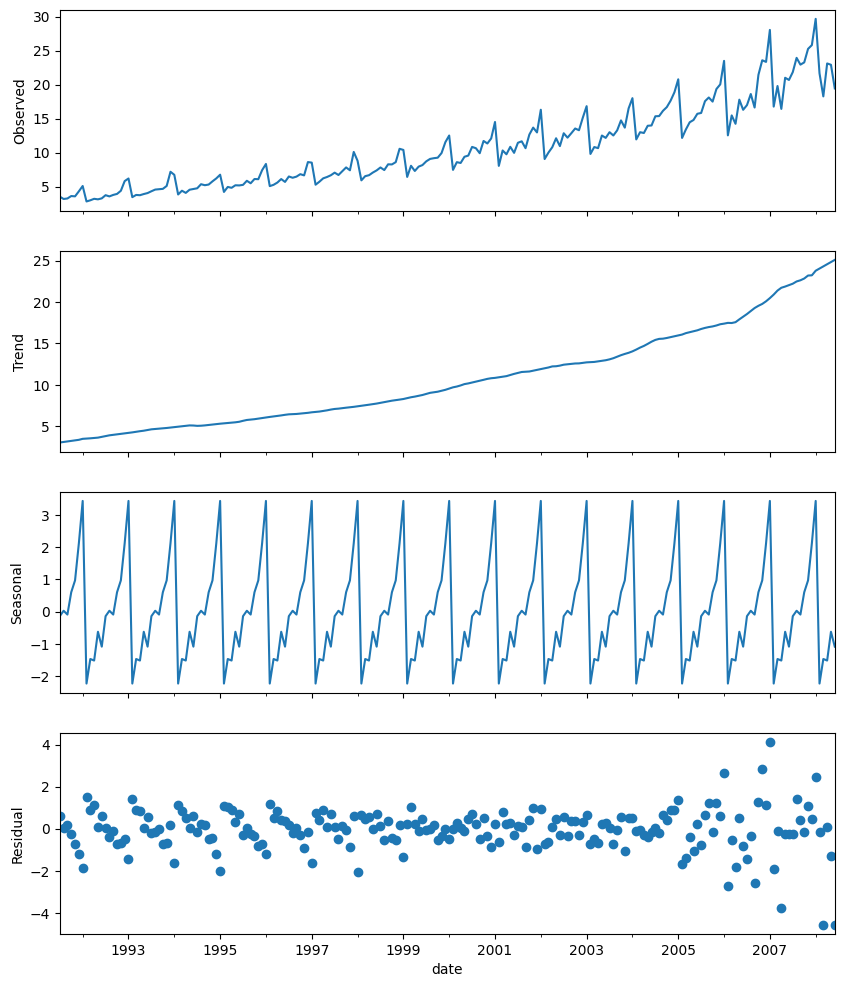

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Multiplicative Decomposition 
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')

# Plot
fig, axes = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(10,12))
result_add.observed.plot(ax=axes[0], legend=False)
axes[0].set_ylabel('Observed')
result_add.trend.plot(ax=axes[1], legend=False)
axes[1].set_ylabel('Trend')
result_add.seasonal.plot(ax=axes[2], legend=False)
axes[2].set_ylabel('Seasonal')
result_add.resid.plot(ax=axes[3], legend=False, style='o')
axes[3].set_ylabel('Residual')
plt.show()

**Multiplicative Time Series**:
Value = Base Level x Trend x Seasonality x Error

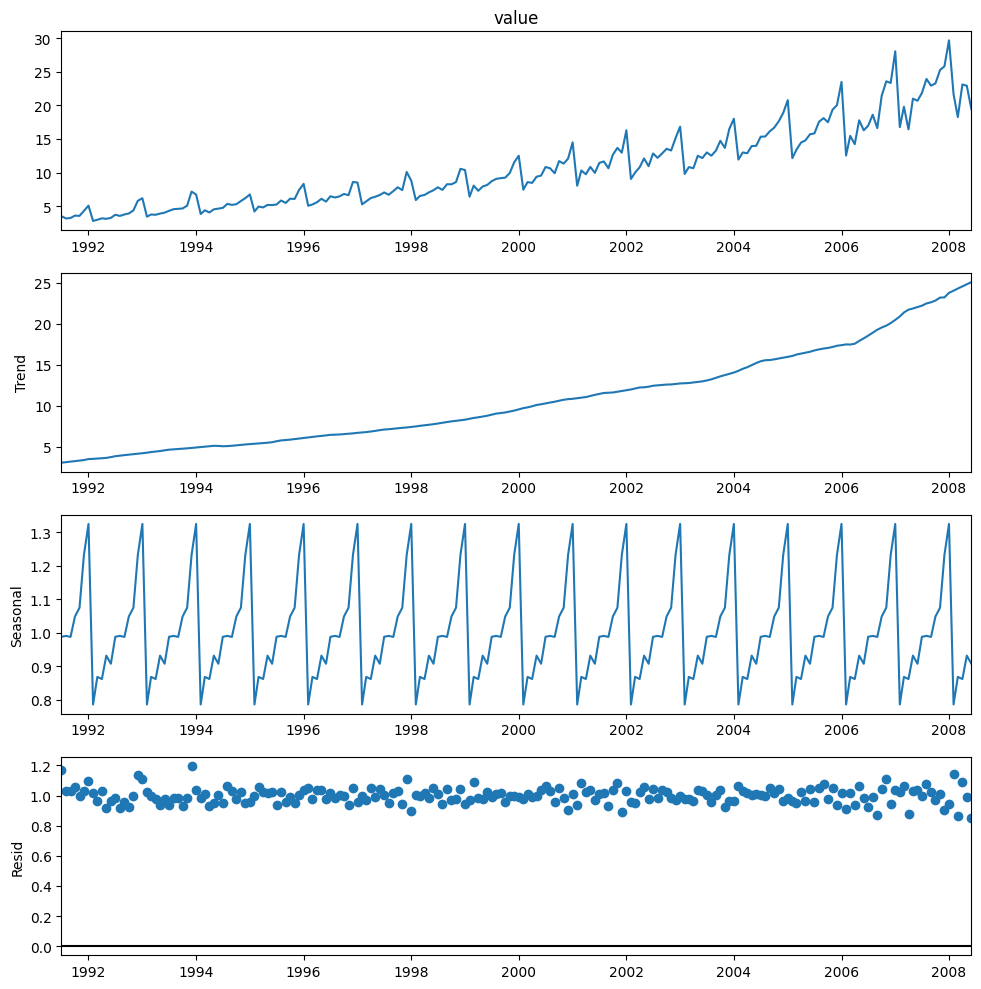

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10, 10)})
result_mul.plot()
plt.show()

Proviamo a rifare il grafico delle distrubuzioni per mese sulla time series che rappresenta la sola stagionalià:

<AxesSubplot: xlabel='seasonal'>

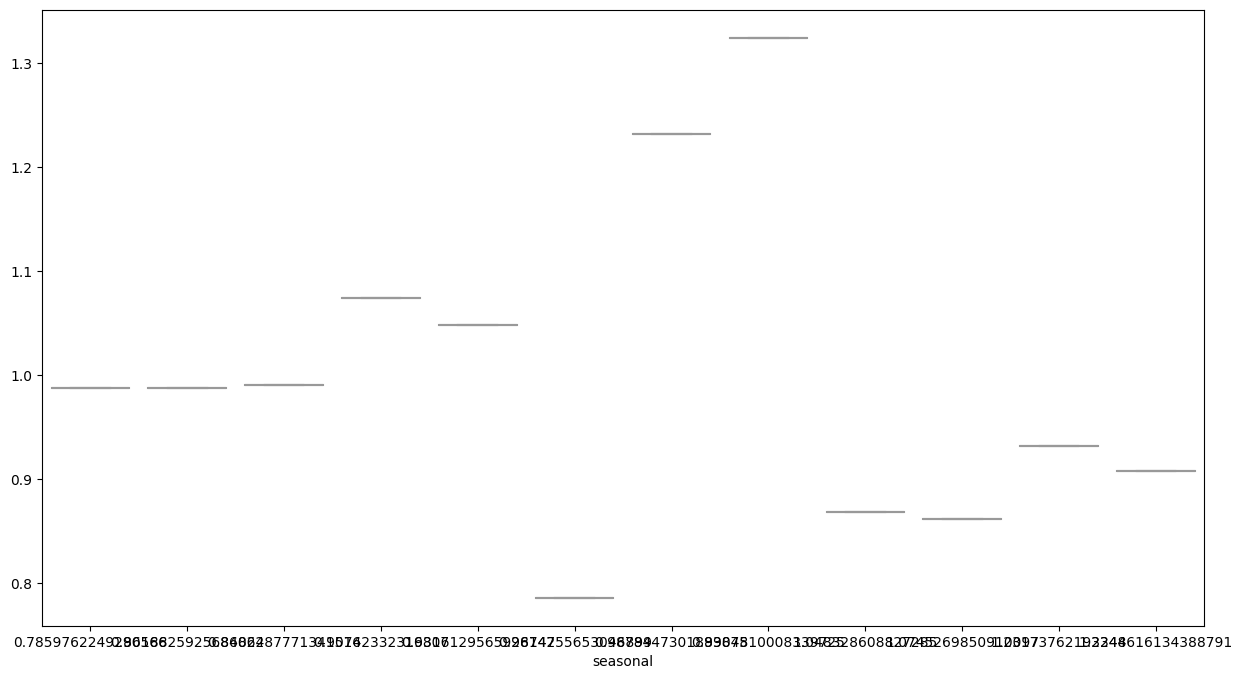

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.boxplot(data=result_mul.seasonal,
           x=result_mul.seasonal.index.month,
           y=result_mul.seasonal.values,
           color='white')

Come era facile aspettarsi notiamo in questo grafico che:
1. i boxplot sono tutti molto schiacciati (in realtà in ogni mese abbiamo sempre e solo 1 valore)
1. i boxplot sono molto differenziati tra loro, lasciando intendere che ci sia un qualche pattern che si ripete nei 12 mesi.

<a id='section2-4'></a>
### Eliminare i trend o stagionalità

A questo punto, realizzata una scomposizione della serie storica nelle sue componenti principali, è possibile ripulire dai dati alcuni effetti che possono complicare l'analisi.

Per esempio è possibile rimuovere dalla serie il trend.

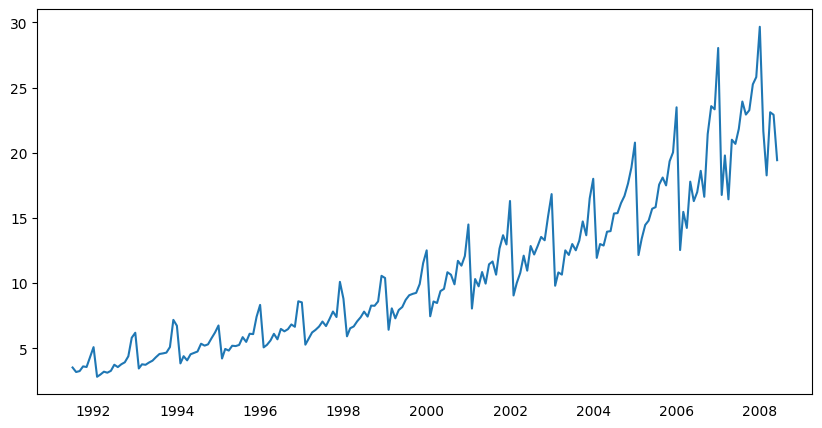

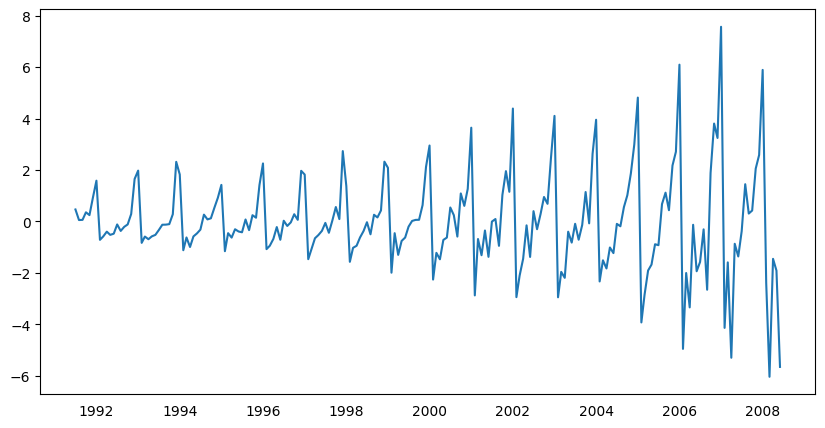

In [10]:
plt.rcParams.update({'figure.figsize': (10, 5)})

df_detrend = df.copy()
plt.plot(df_detrend.index, df_detrend.value)
plt.show()

from scipy import signal
from statsmodels.tsa.seasonal import seasonal_decompose

result_mul = seasonal_decompose(df_detrend['value'], model='multiplicative', extrapolate_trend='freq')
detrended = df_detrend.value.values / result_mul.trend
plt.plot(df_detrend.index, detrended)
plt.show()

Alternativamente, è possibile eliminare dalle serie storiche gli effetti di stagionalità:

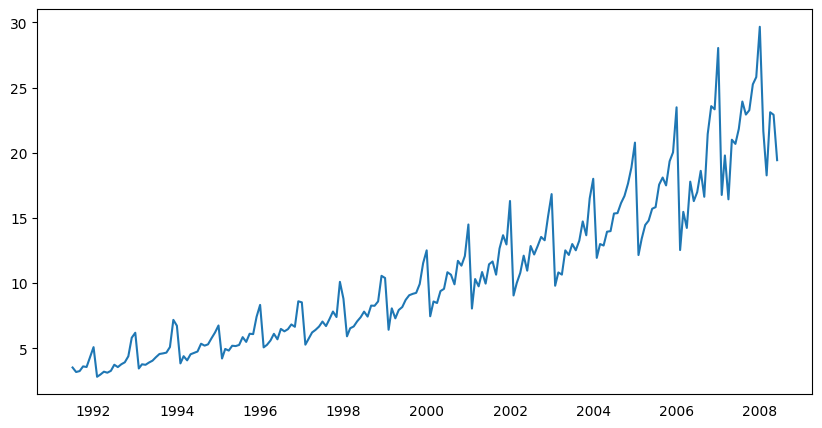

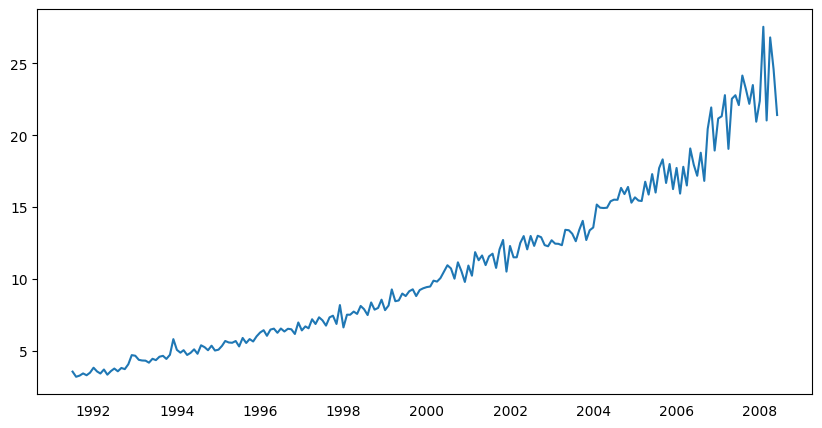

In [11]:
plt.rcParams.update({'figure.figsize': (10, 5)})

df_deseason = df.copy()
plt.plot(df_deseason.index, df_deseason.value)
plt.show()

from scipy import signal
from statsmodels.tsa.seasonal import seasonal_decompose

result_mul = seasonal_decompose(df_deseason['value'], model='multiplicative', extrapolate_trend='freq')
deseasonalized = df_deseason.value.values / result_mul.seasonal

plt.plot(df_deseason.index, deseasonalized)
plt.show()

Ovviamente è possibile applicare entrambe le tecniche:

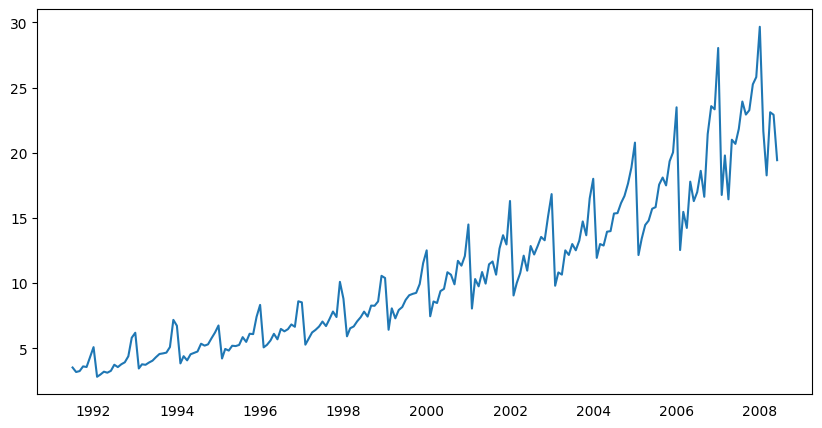

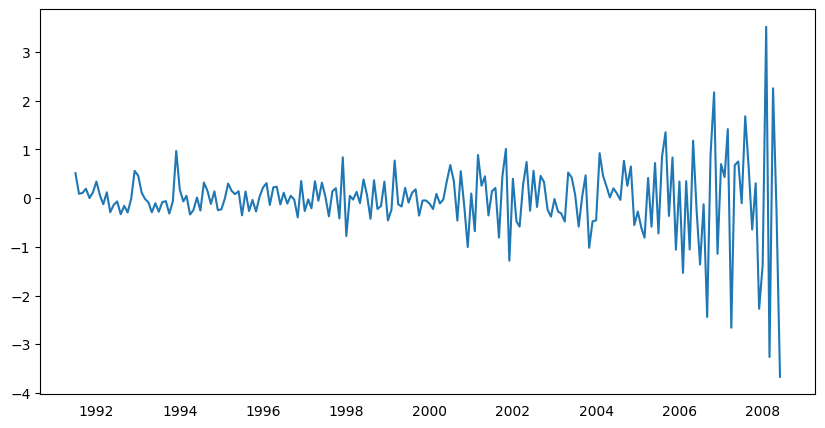

In [12]:
plt.rcParams.update({'figure.figsize': (10, 5)})

df_deseason_detrend = df.copy()
plt.plot(df_deseason_detrend.index, df_deseason_detrend.value)
plt.show()

from scipy import signal
from statsmodels.tsa.seasonal import seasonal_decompose

result_mul = seasonal_decompose(df_deseason_detrend['value'], model='multiplicative', extrapolate_trend='freq')
deseasoned = df_deseason_detrend.value.values / result_mul.seasonal
deseasoned_detrended = deseasoned - result_mul.trend

plt.plot(df_deseason_detrend.index, deseasoned_detrended)
plt.show()

<a id='section2-5'></a>
### Ammorbidire una serie storica

Il livellamento di una serie storica può essere utile in questi casi:

- Riducendo l'effetto del rumore in un segnale si ottiene una discreta approssimazione delle serie.
- La versione "liscia" della serie può essere utilizzata come funzione per spiegare la serie originale stessa.
- In questo modo si visualizza meglio la tendenza sottostante.

Quindi, come è possibile ammorbidire una serie storica? Discutiamo i seguenti metodi:

1. media mobile
2. livellamento LOESS (regressione localizzata)

La media mobile non è altro che la media di una finestra mobile di larghezza definita. Ma devi scegliere saggiamente la larghezza della finestra, perché, le dimensioni di una finestra di grandi dimensioni renderanno più liscia la serie. Ad esempio, una finestra di dimensioni pari alla durata stagionale (es: 12 per una serie mensile) annullerà efficacemente l'effetto stagionale.

LOESS, abbreviazione di "regressione ridotta", si adatta a più regressioni nel quartiere locale di ciascun punto. È implementato nel pacchetto statsmodels, dove puoi controllare il grado di smoothing usando l'argomento frac che specifica la percentuale di punti dati vicini che dovrebbero essere considerati adatti a un modello di regressione.

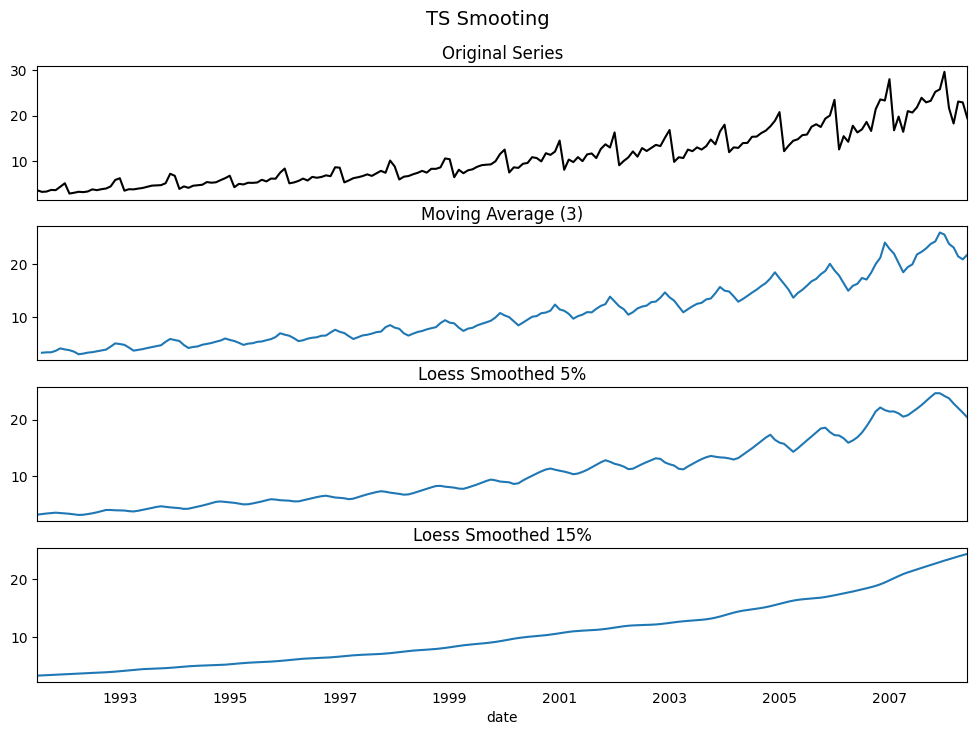

In [13]:
from statsmodels.nonparametric.smoothers_lowess import lowess

plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})

df_smoote = df.copy()

# 1. Moving Average
df_ma = df_smoote.value.rolling(3, center=True, closed='both').mean()

# 2. Loess Smoothing (5% and 15%)
df_loess_5 = pd.DataFrame(lowess(df_smoote.value, np.arange(len(df_smoote.value)), frac=0.05)[:, 1], index=df_smoote.index, columns=['value'])
df_loess_15 = pd.DataFrame(lowess(df_smoote.value, np.arange(len(df_smoote.value)), frac=0.15)[:, 1], index=df_smoote.index, columns=['value'])

# Plot
fig, axes = plt.subplots(4,1, figsize=(12, 8), sharex=True, dpi=100)
df_smoote['value'].plot(ax=axes[0], color='k', title='Original Series')

df_ma.plot(ax=axes[1], title='Moving Average (3)')
df_loess_5['value'].plot(ax=axes[2], title='Loess Smoothed 5%')
df_loess_15['value'].plot(ax=axes[3], title='Loess Smoothed 15%')

fig.suptitle('TS Smooting', y=0.95, fontsize=14)
plt.show()

<a id='section3'></a>
## Fare il forecast di una serie storica

Uno dei metodi più comunemente utilizzati per la previsione di serie storiche, noto come ARIMA, che sta per autoregressiva media mobile integrata.

I modelli ARIMA sono indicati con la notazione ARIMA(p, d, q). Questi tre parametri spiegano la stagionalità, l'andamento e il rumore nei dati.

Proviamo, partendo dal nostro dataset a rimuovere gli ultimi due anni e vedere se con un modello ARIMA saremmo in grado di prevedere in modo soddisfacende l'andamento futuro.

In [3]:
df = pd.read_csv('data/a10.csv', parse_dates=['date'], index_col='date')

future = df[-24:]
past = df[:-24]

In [15]:
import pmdarima as pm

smodel = pm.auto_arima(past, start_p=1, start_q=1,
                       test='adf',
                       max_p=3, max_q=3, m=12,
                       start_P=0, seasonal=True,
                       d=None, D=1, trace=True,
                       error_action='ignore',  
                       suppress_warnings=True, 
                       stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=331.086, Time=124.55 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=369.596, Time=1.34 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=362.402, Time=39.37 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=367.046, Time=23.19 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=546.314, Time=0.49 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=332.975, Time=12.34 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=161.81 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=329.553, Time=245.90 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=335.077, Time=348.20 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=368.302, Time=97.14 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=362.333, Time=118.42 sec
 ARIMA(2,0,1)(0,1,2)[12] intercept   : AIC=323.157, Time=147.13 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=323.874, Time=66.00 sec
 ARIMA(2,0,1)(1,1,2)[12] intercept   : AIC=325.222, Time=404.50 sec
 ARIMA(2,0,1)(1,1,

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  180
Model:             SARIMAX(2, 0, 1)x(0, 1, [1, 2], 12)   Log Likelihood                -154.579
Date:                                 Fri, 20 Jan 2023   AIC                            323.157
Time:                                         15:26:01   BIC                            345.025
Sample:                                     07-01-1991   HQIC                           332.032
                                          - 06-01-2006                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1151      0.062      1.859      0.063      -0.006       0.237
ar.L1          0.5564      0.127      4.369      0.000       0.307       0.806
ar.L2          0.3255      0.095      3.414      0.001       0.139       0.512
ma.L1         -0.4932      0.125     -3.937      0.000      -0.739      -0.248
ma.S.L12      -0.1378      0.078     -1.766      0.077      -0.291       0.015
ma.S.L24      -0.1445      0.087     -1.653      0.098      -0.316       0.027
sigma2         0.3655      0.035     10.486      0.000       0.297       0.434
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                10.88
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               4.36   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Il migliro modello stimato è il ARIMA(2,0,1)(0,1,2)[12] che ha un AIC (Akaike Information Critera) uguale a 323.157. Il parametro AIC è una misura del modello statistico, quando si comparano due modelli, solitamente quello con AIC pià basso è considerato migliore.

Proviamo quindi a prevedere cosa accadrà nei successivi 24 mesi.

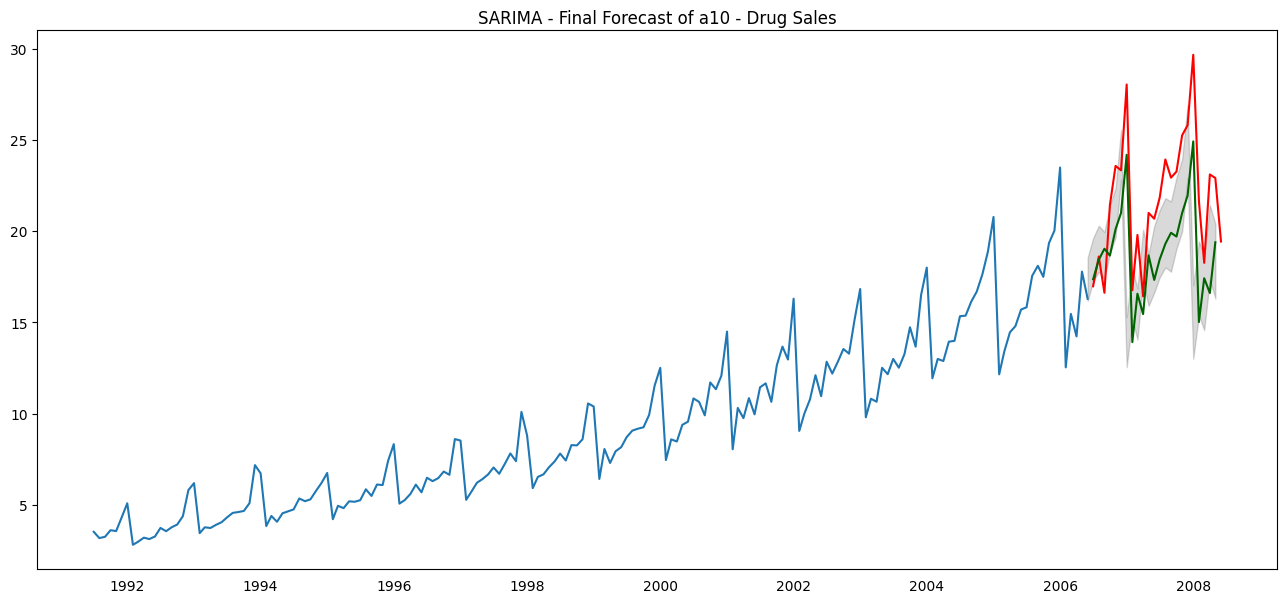

In [16]:
# Forecast
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(past.index[-1], periods=n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.figure(figsize=(16, 7))

plt.plot(past)
plt.plot(future, color='red')

plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of a10 - Drug Sales")
plt.show()

La previsione è stata non completamente soddisfacente, come si vede nel grafico la curva prevista (verde scura) è sempre sotto alal curva reale dei dati osservati (rosso) e quest'ultima si trova fuori dall'intervallo di confidenza (area grigia).

Il modello ha avuto difficoltà a prevedere l'andamento dei dati puntuali, ma magari a noi potrebbe interessare avere informazioni solo sul trend. In questo caso possiamo decomporre la serie storica nelle sue componenti e quindi provare a fare una previsione con ARIMA sulla sola componente del trend (che è anch'essa una serie storica, ovviamente).

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')
future = result_mul.trend[-24:]
past = result_mul.trend[:-24]

In [13]:
import pmdarima as pm

smodel = pm.auto_arima(past, start_p=1, start_q=1,
                       test='adf',
                       max_p=3, max_q=3,
                       start_P=0, seasonal=False,
                       d=None, D=1, trace=True,
                       error_action='ignore',  
                       suppress_warnings=True, 
                       stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-678.555, Time=0.88 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-537.702, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-672.116, Time=0.37 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-667.222, Time=0.63 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-314.038, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-696.041, Time=1.36 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-673.176, Time=0.45 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-694.885, Time=1.41 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-694.671, Time=1.57 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-693.205, Time=1.21 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-680.926, Time=0.74 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-692.344, Time=1.77 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-678.069, Time=0.72 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 11.479 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  180
Model:               SARIMAX(2, 1, 1)   Log Likelihood                 353.021
Date:                Tue, 07 Feb 2023   AIC                           -696.041
Time:                        11:53:44   BIC                           -680.104
Sample:                    07-01-1991   HQIC                          -689.579
                         - 06-01-2006                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0424      0.010      4.156      0.000       0.022       0.062
ar.L1          0.0757      0.046      1.659      0.097      -0.014       0.165
ar.L2          0.4359      0.062      7.051      0.000       0.315       0.557
ma.L1          0.9764      0.030     32.874      0.000       0.918       1.035
sigma2         0.0011   8.33e-05     13.410      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):               186.11
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               3.24   Skew:                             0.68
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

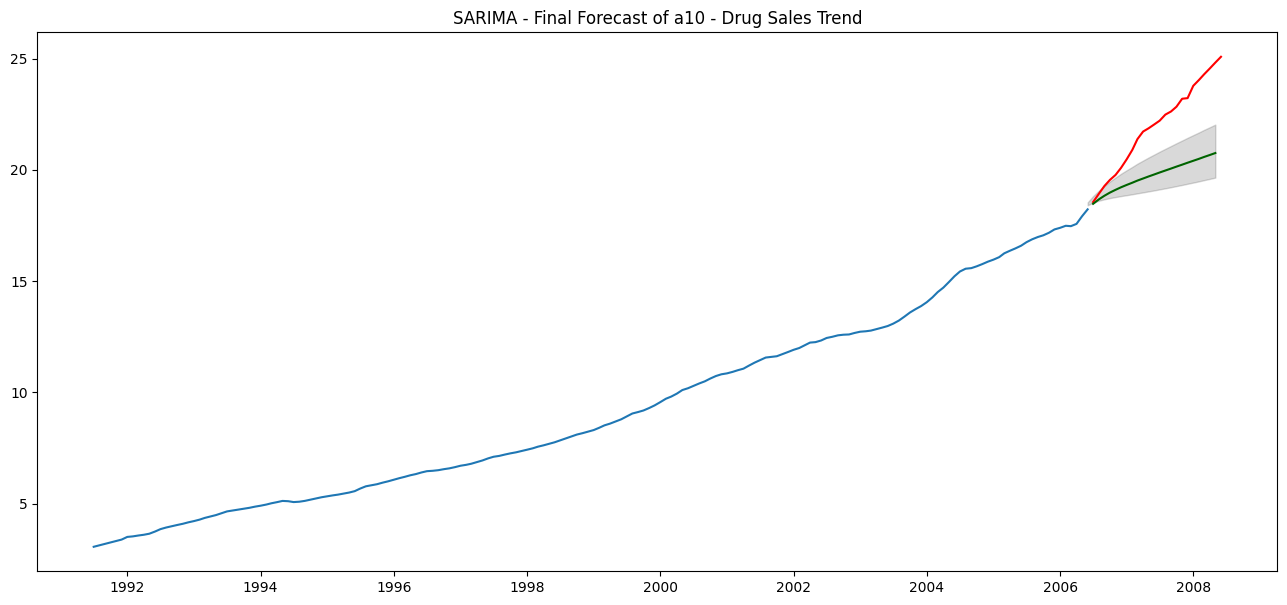

In [15]:
# Forecast
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(past.index[-1], periods=n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.figure(figsize=(16, 7))

plt.plot(past)
plt.plot(future, color='red')

plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of a10 - Drug Sales Trend")
plt.show()

Anche in questo caso la previsione sottostima fortemente il trend di crescita che sembra aver subito un'accelerazione a partire dal 2006.

<a id='section4'></a>
## Prophet

Facebook Prophet è un algoritmo open source per la generazione di modelli di serie temporali che utilizza alcune vecchie idee con alcuni nuovi colpi di scena. È particolarmente efficace nella modellazione di serie temporali che hanno più stagionalità e non affronta alcuni degli inconvenienti di altri algoritmi.

Documentazione ufficiale: https://facebook.github.io/prophet/docs/quick_start.html

Procedura per la previsione dei dati delle serie temporali sulla base di un modello additivo in cui le tendenze non lineari si adattano alla stagionalità annuale, settimanale e giornaliera, oltre agli effetti delle vacanze.

Il modello additivo è un modello come:
$Data = seasonal\space effect + trend + residual$

invece, il modello moltiplicativo è:  
$Data = seasonal\space effect * trend * residual$

L'algoritmo fornisce statistiche utili che aiutano a visualizzare il processo di ottimizzazione, ad es. trend, trend della settimana, trend dell'anno e relativi errori massimi e minimi.

### Data

I dati su cui verranno addestrati e testati gli algoritmi provengono dal database Kaggle Hourly Energy Consumption. Viene raccolto da PJM Interconnection, una società che coordina l'acquisto, la vendita e la consegna continui di elettricità all'ingrosso attraverso il mercato dell'energia dai fornitori ai clienti nella regione della Carolina del Sud, negli Stati Uniti. Tutti i file .csv contengono righe con un timestamp e un valore. Il nome della colonna del valore corrisponde al nome del contraente. il timestamp rappresenta una singola ora e il valore rappresenta l'energia totale, consumata durante quell'ora.

I dati che utilizzeremo sono i dati sul consumo energetico orario di PJM. Il consumo di energia ha delle caratteristiche uniche. Sarà interessante vedere come il profeta li raccoglie.

https://www.kaggle.com/robikscube/hourly-energy-consumption

Prendiamo il PJM East che ha dati dal 2002 al 2018 per l'intera regione orientale.

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error

plt.style.use('fivethirtyeight') # For plots

In [18]:
dataset_path = './data/PJME_hourly.csv'
df = pd.read_csv(dataset_path, index_col=[0], parse_dates=[0])

print("Dataset path:", df.shape)
df.head(10)

Dataset path: (145366, 1)


,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0
2002-12-31 06:00:00,26222.0
2002-12-31 07:00:00,28702.0
2002-12-31 08:00:00,30698.0
2002-12-31 09:00:00,31800.0


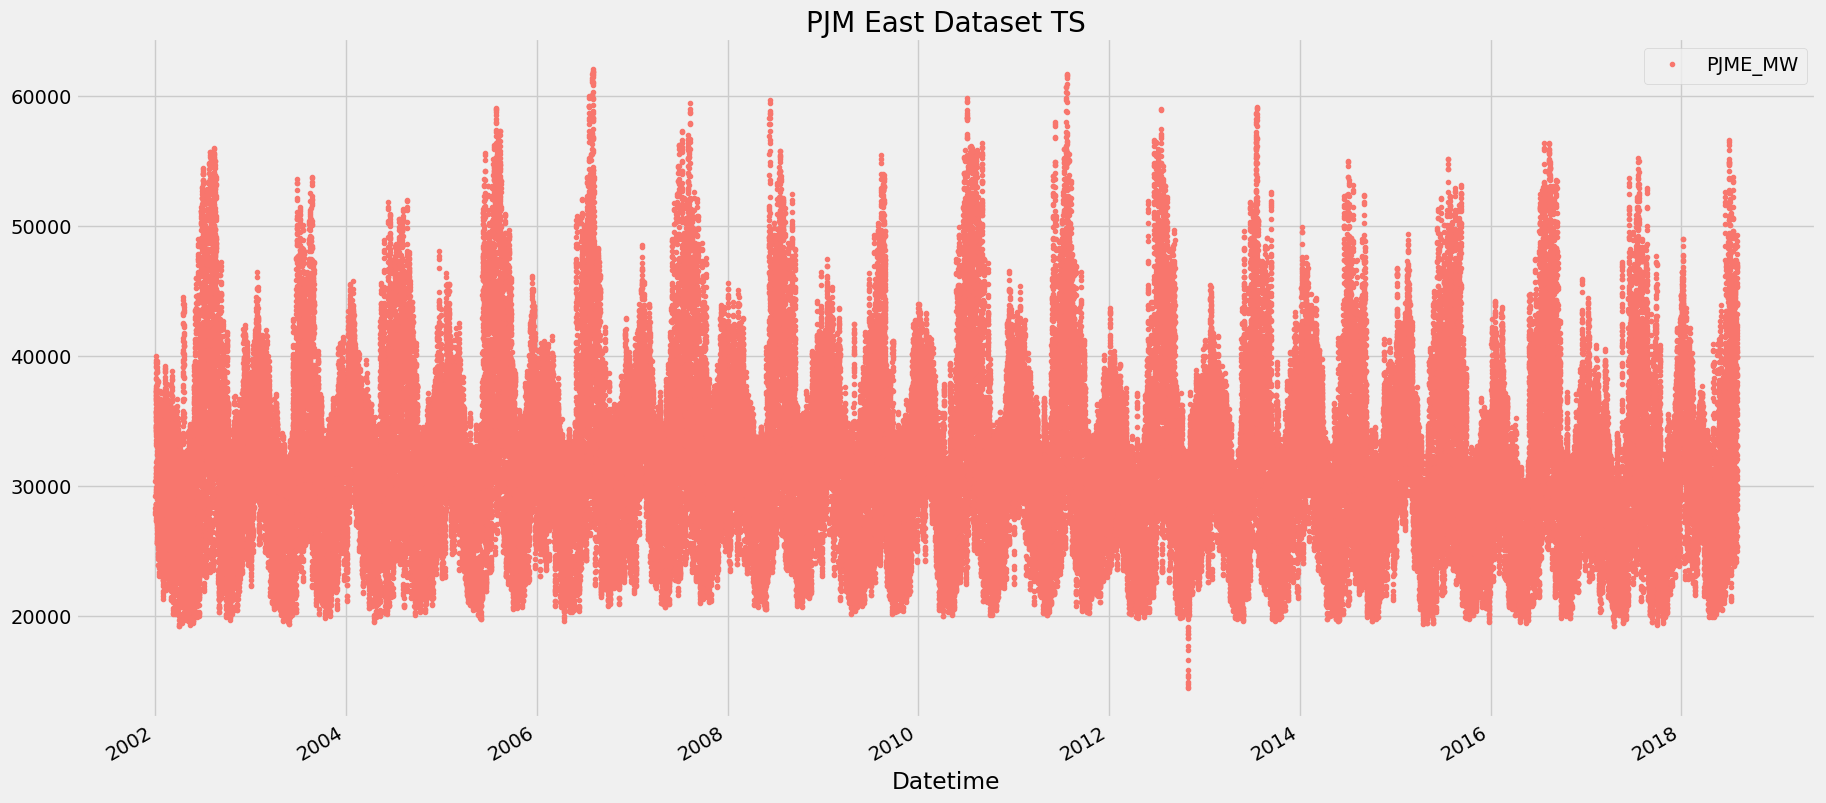

In [19]:
# VISUALIZE DATA
# Color pallete for plotting
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
df.plot(style='.', figsize=(20,10), color=color_pal[0], title='PJM East Dataset TS')
plt.show()

In [20]:
# Decompose the seasonal data

def create_features(df, label=None):
    """
    Creates time series features from datetime index.
    """
    df = df.copy()
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    
    if label:
        y = df[label]
        return X, y
    return X

In [21]:
df.columns

Index(['PJME_MW'], dtype='object')

In [22]:
X, y = create_features(df, label='PJME_MW')

features_and_target = pd.concat([X, y], axis=1)

print("Shape",features_and_target.shape)
features_and_target.head(10)

/tmp/ipykernel_2616/1553903594.py:16: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['date'].dt.weekofyear


Shape (145366, 9)


,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,PJME_MW
Datetime,,,,,,,,,
2002-12-31 01:00:00,1,1,4,12,2002,365,31,1,26498.0
2002-12-31 02:00:00,2,1,4,12,2002,365,31,1,25147.0
2002-12-31 03:00:00,3,1,4,12,2002,365,31,1,24574.0
2002-12-31 04:00:00,4,1,4,12,2002,365,31,1,24393.0
2002-12-31 05:00:00,5,1,4,12,2002,365,31,1,24860.0
2002-12-31 06:00:00,6,1,4,12,2002,365,31,1,26222.0
2002-12-31 07:00:00,7,1,4,12,2002,365,31,1,28702.0
2002-12-31 08:00:00,8,1,4,12,2002,365,31,1,30698.0
2002-12-31 09:00:00,9,1,4,12,2002,365,31,1,31800.0


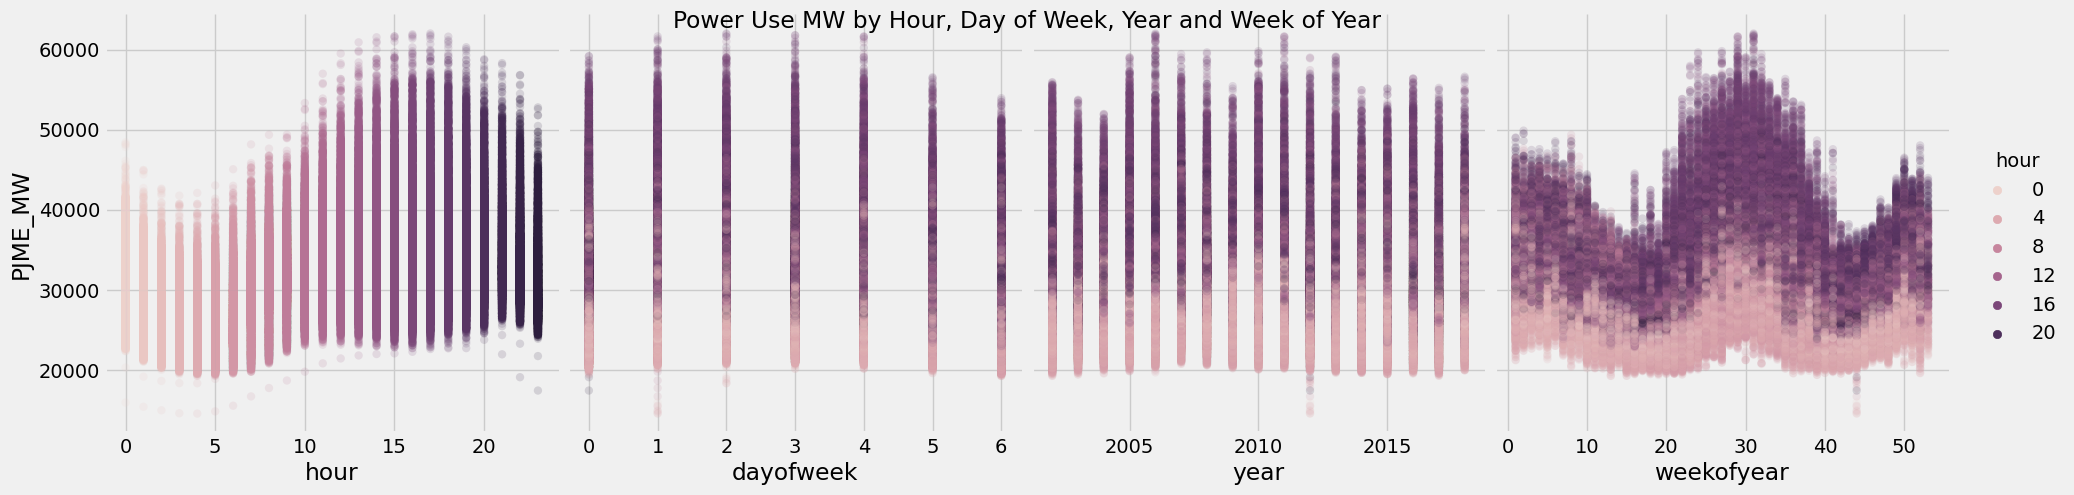

In [23]:
sns.pairplot(features_and_target.dropna(),
             hue='hour',
             x_vars=['hour','dayofweek', 'year','weekofyear'],
             y_vars='PJME_MW',
             height=5,
             plot_kws={'alpha':0.15, 'linewidth':0}
            )
plt.suptitle('Power Use MW by Hour, Day of Week, Year and Week of Year')
plt.show()

## Suddivisione tra Train e Test

Usiamo una divisione temporale, mantenendo i vecchi dati e usiamo solo il nuovo periodo per fare la previsione:

In [24]:
split_date = '01-Jan-2015'
pjme_train = df.loc[df.index <= split_date].copy()
pjme_test = df.loc[df.index > split_date].copy()

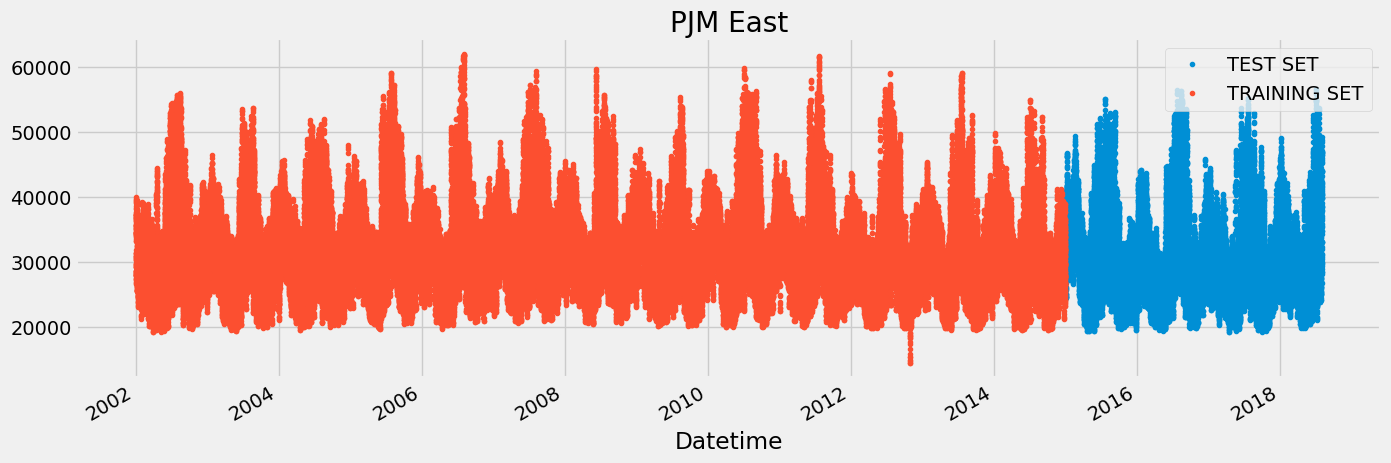

In [25]:
# Plot train and test so you can see where we have split
pjme_test \
    .rename(columns={'PJME_MW': 'TEST SET'}) \
    .join(pjme_train.rename(columns={'PJME_MW': 'TRAINING SET'}),
          how='outer') \
    .plot(figsize=(15,5), title='PJM East', style='.')
plt.show()

Per utilizzare Prophet è necessario rinominare correttamente le funzionalità e l'etichetta per passare correttamente l'input al motore.

In [26]:
# Format data for prophet model using ds and y
pjme_train = pjme_train.reset_index().rename(columns={'Datetime': 'ds', 'PJME_MW': 'y'})
pjme_train.head(5)

,ds,y
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


### Creiamo e trainiamo il modello

In [ ]:
model = Prophet()
model.fit(pjme_train)

16:03:00 - cmdstanpy - INFO - Chain [1] start processing


In [ ]:
# Predict on training set with model
pjme_test = pjme_test.reset_index().rename(columns={'Datetime':'ds'})
pjme_test_fcst = model.predict(df=pjme_test)

In [ ]:
pjme_test_fcst.head()

### Grafichiamo i risultati e la previsione

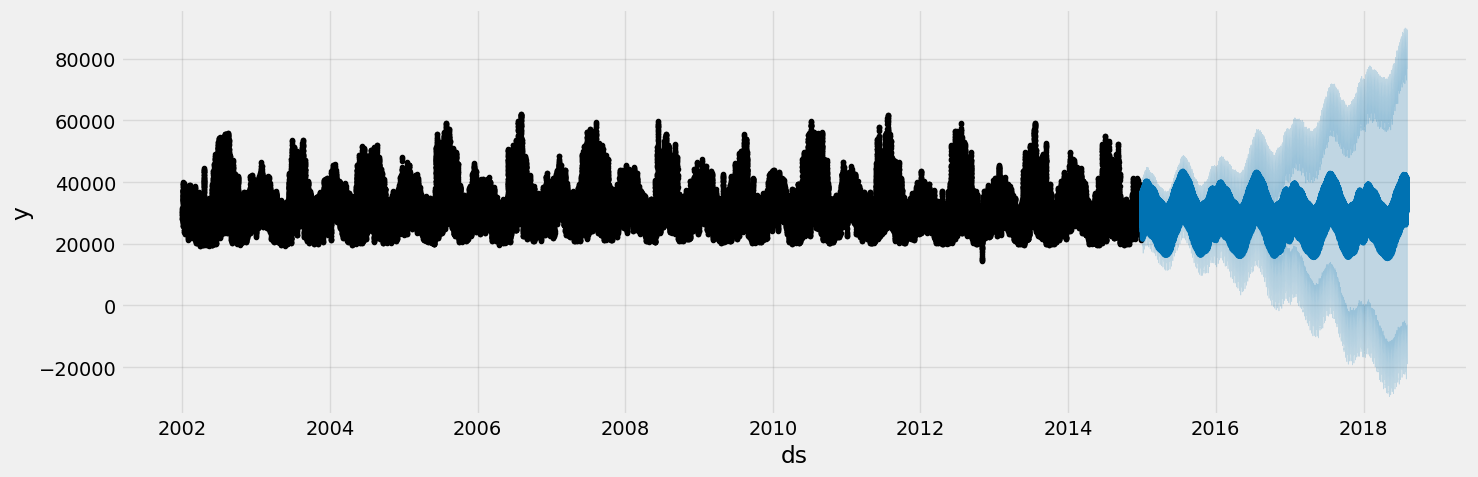

In [31]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(pjme_test_fcst, ax=ax)
plt.show()

Disegniamo i componenti del modello:

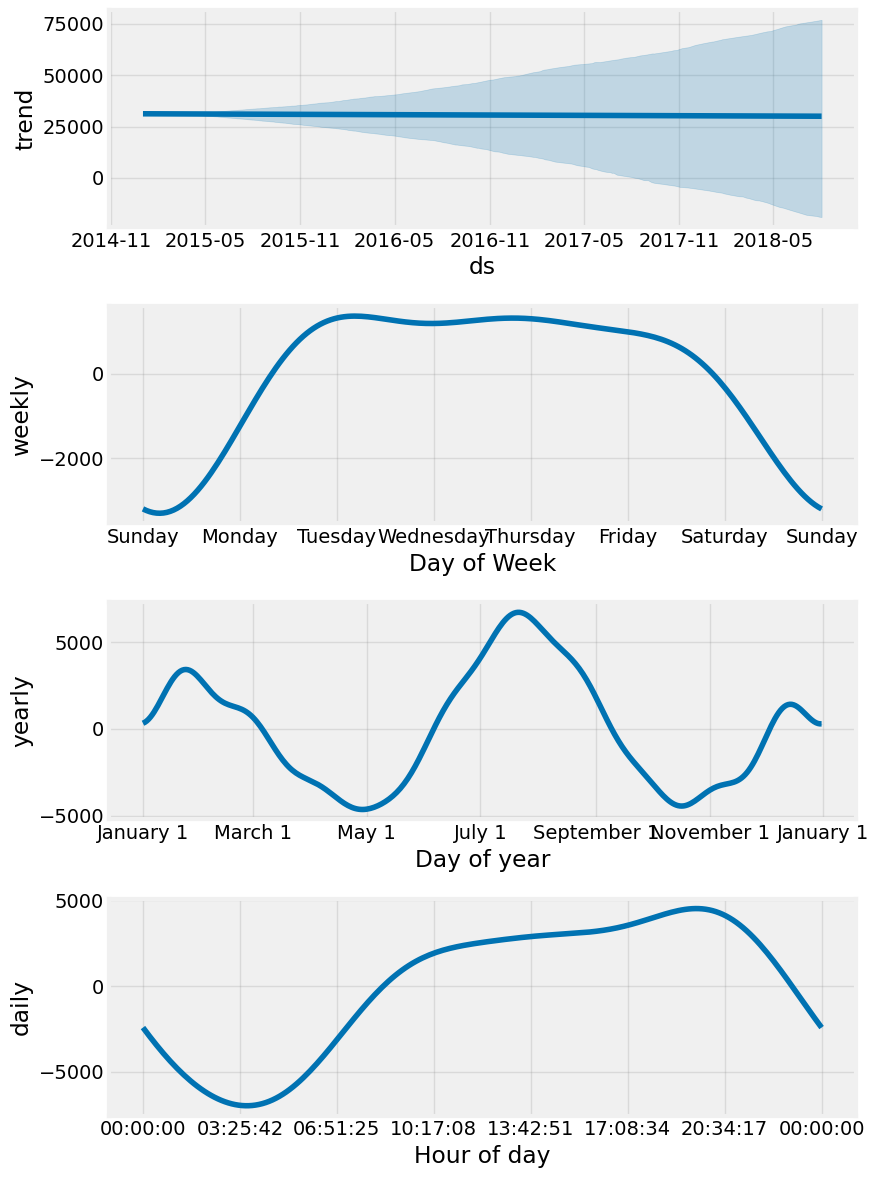

In [32]:
fig = model.plot_components(pjme_test_fcst)

[Clicca qui per tornare all'inizio della pagina](#start)<a id='start'></a>